# Microservice JSS

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Define some constant for plots

In [63]:
LANG="en_US.UTF-8"
LANGUAGE="en_US.UTF-8"
LC_ALL="en_US.UTF-8"

#sns.set(font='Jetbrains Mono') # Set font
facecolor_reactive_global = [48/255, 112/255, 173/255, .85]
edgecolor_reactive_global = [48/255, 112/255, 173/255, 1.]
label_reactive_global = "Reactive Global Scaling"

facecolor_reactive_local = [111/255, 178/255, 228/255, .85]
edgecolor_reactive_local = [111/255, 178/255, 228/255, 1.]
label_reactive_local = "Reactive Local Scaling"

## Reactive Local vs Reactive Global Enron

In [64]:
data_folder = 'K15_k4/'
data_files = ['reactive_local_enron.txt', 'reactive_global_enron.txt']

target_cols = ['Latency (ms)', 'Deployed instances', 'Message Loss']
target_labels = ['Latency (milliseconds)', 'Deployed Microservices', 'Message Loss']
save_labels = ['latency', 'deployed_instaces', 'loss']
steps = [50, 10, 200]

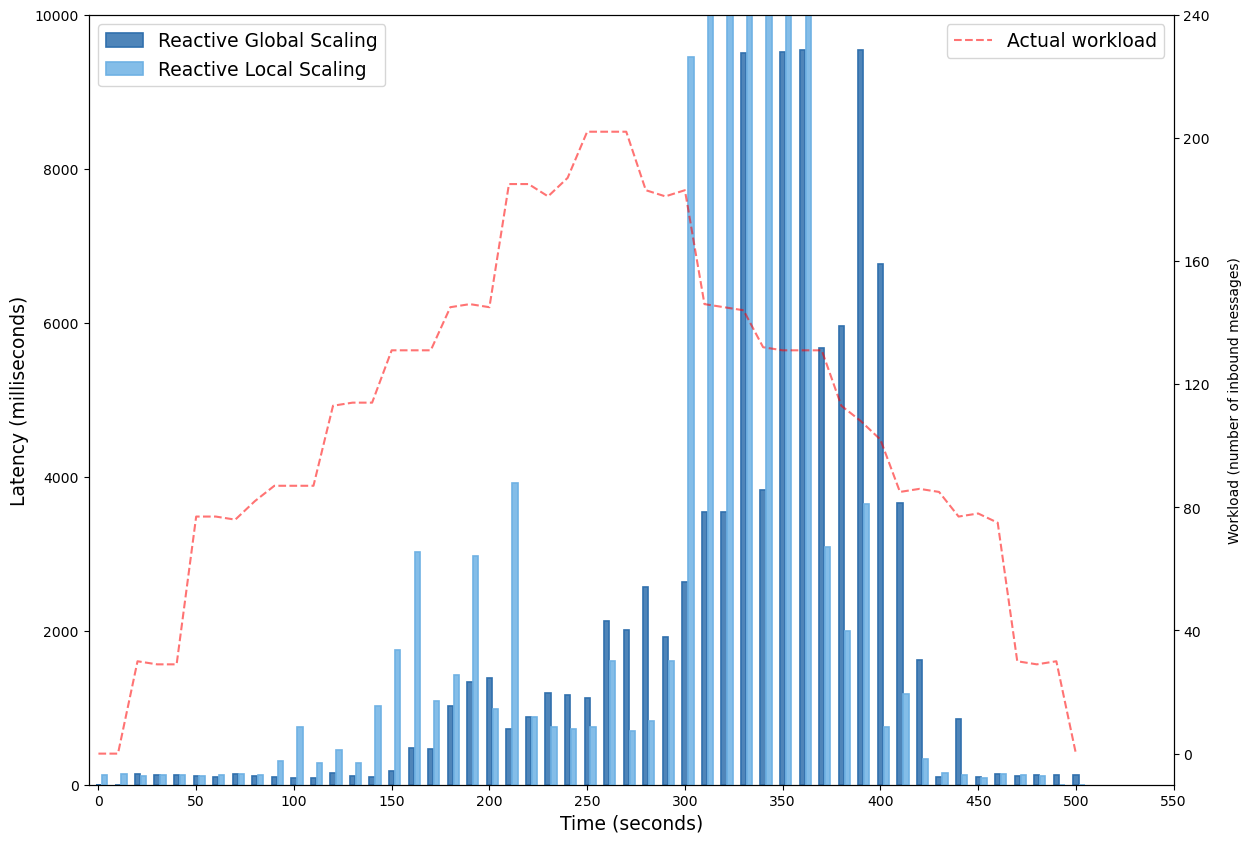

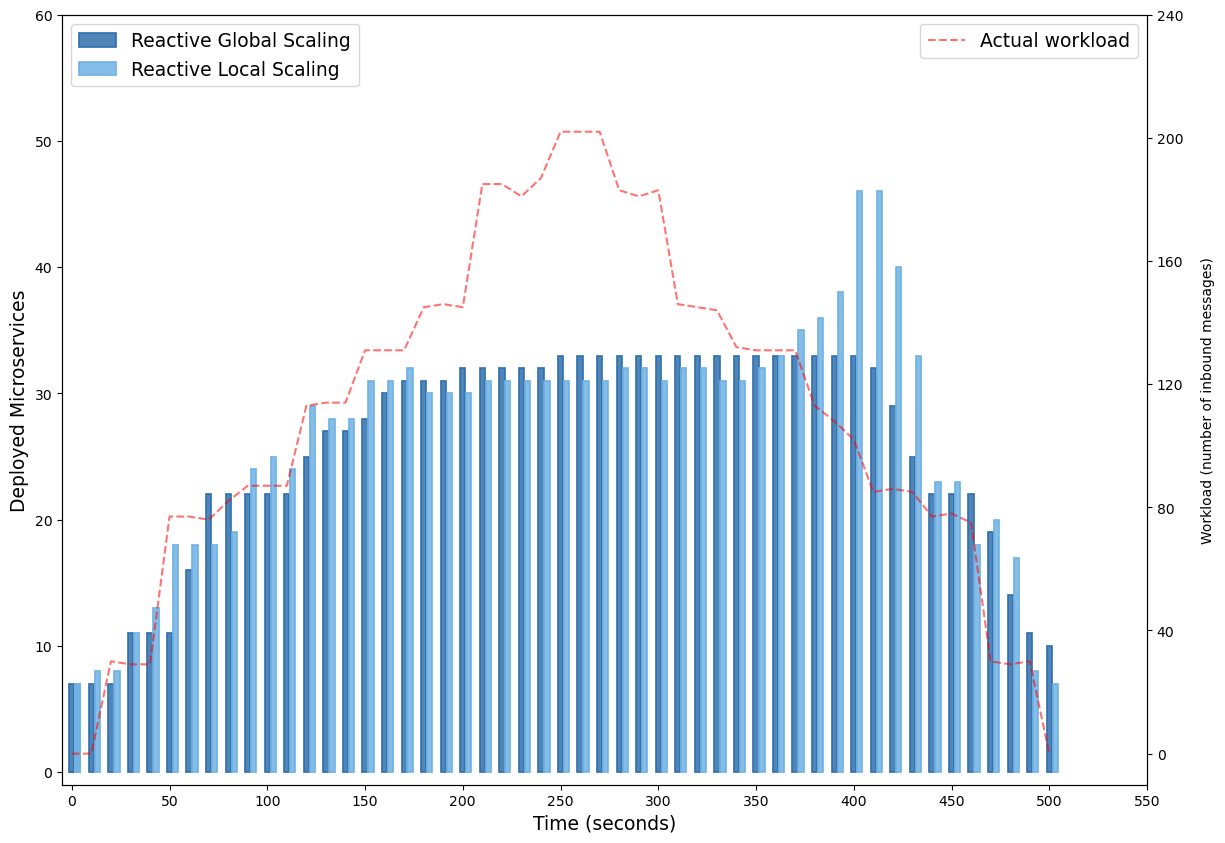

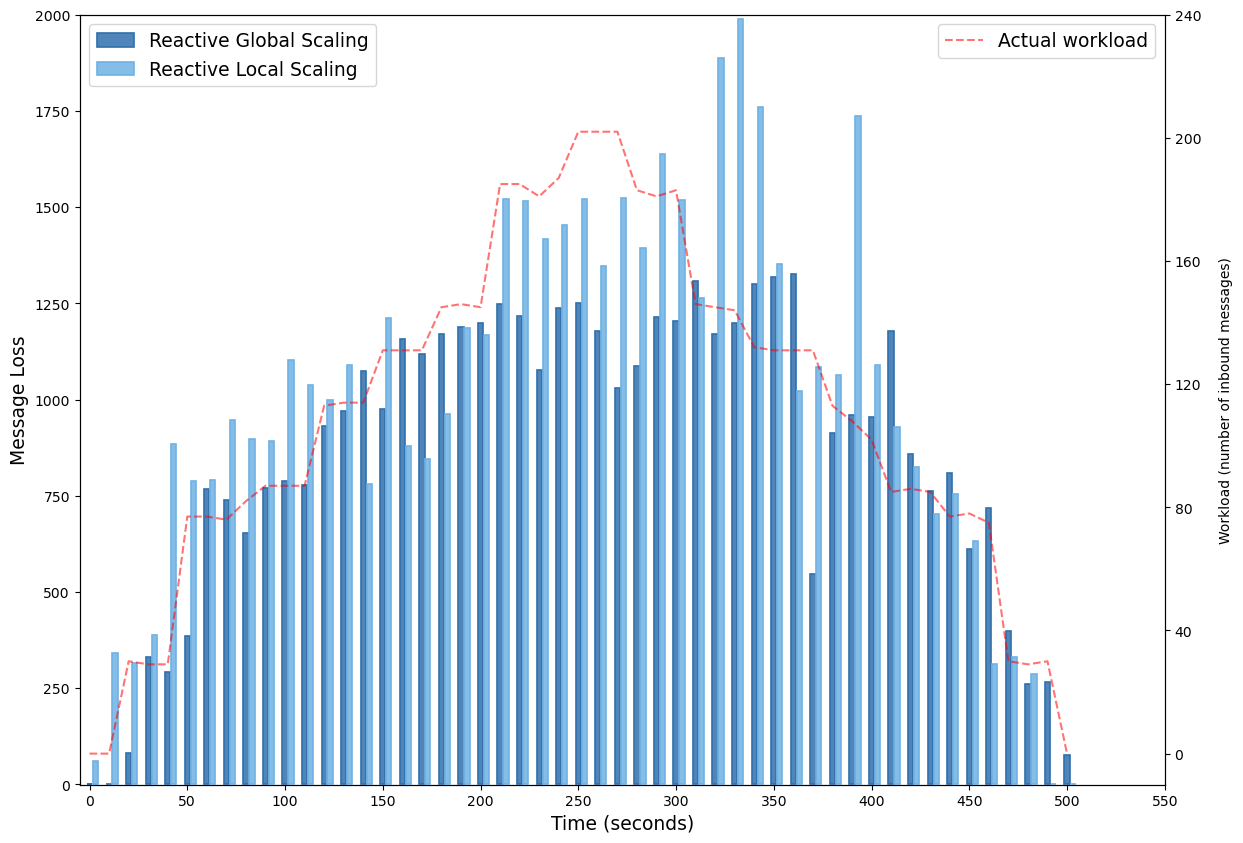

In [65]:
usecols_global = [0,1,3,7,9,13]
usecols_local = [0,1,3,5,9,13]

column_names = [
    "Time (ms)", 
    "Latency (ms)", 
    "Measured Scale Target",
    "Completed msgs",
    "Message Loss",
    "Deployed instances",
]
dfs = {}
for file in data_files:
    scenario = file.split('_')[1]
    if scenario == 'global': cols = usecols_global
    else: cols = usecols_local
    df = pd.read_csv(
            data_folder+file, 
            delim_whitespace=True,
            usecols=cols,
            names=column_names,
            skiprows=[])
    dfs[scenario] = df
        
for target_col, target_label, save_label, step in zip(target_cols, target_labels, save_labels, steps):
    x = dfs['global']['Time (ms)']
    y_msgs = dfs['global']['Measured Scale Target']
    y_global = dfs['global'][target_col]
    y_local = dfs['local'][target_col]
    fig = plt.figure(figsize=[14,10])
    ax = plt.subplot(111)
    ax_background = ax.twinx()

    width = 2.7

    if save_label == 'latency':
        up = 10000
        down = -1
    elif save_label == 'deployed_instaces':
        up = 60
        down = -1
    else:
        up = 2000
        down = -1


    # define plots
    g = ax.bar(
        x, 
        y_global, 
        linestyle='solid', 
        facecolor=facecolor_reactive_global,
        edgecolor=edgecolor_reactive_global,
        linewidth=1.2,
        label=label_reactive_global,
        zorder=1,
        width=width,
    )
    l = ax.bar(
        x+width+0.35, 
        y_local, 
        linestyle='solid', 
        facecolor=facecolor_reactive_local,
        edgecolor=edgecolor_reactive_local,
        linewidth=1.2,
        label=label_reactive_local, 
        zorder=100,
        width=width,
    )


    # define background plot
    arrived_msgs = ax_background.plot(x[1:], y_msgs[1:], linestyle='dashed', label='Actual workload', color='red', zorder=1000, alpha=.55)
    # set axis limits
    ax.set_yscale('linear')
    ax.set_xlim(-5, 206)
    ax.set_ylim(down, up)

    # set ticks and labels
    ax.set_ylabel(target_label, fontsize=13.5)
    ax.set_xlabel('Time (seconds)', fontsize=13.5)
    ax.set_xticks(range(0, 600, 50))
    ax.set_xticklabels([str(i) for i in range(0, 600, 50)])
   
    # background ticks and labels
    ax_background.set_yticks(range(0, 250, 40))
    ax_background.grid(False)
    ax_background.yaxis.set_label_coords(1.05, 0.5)
    ax_background.set_ylabel('Workload (number of inbound messages)')

    # legend settings
    ax.legend(loc='upper left', ncol=1, frameon=True, fontsize=13.5)
    ax_background.legend(loc='upper right', ncol=1, frameon=True, fontsize=13.5)

    fig.savefig(f'./save_files/K15_k4/{save_label}_reactiveL_vs_reactiveG.pdf', dpi=300, format='pdf', bbox_inches='tight')
